We are using Wheat dataset (https://www.kaggle.com/dongeorge/seed-from-uci) for this notebook. It's one of easy & important dataset to learn & practice the machine learning concepts.


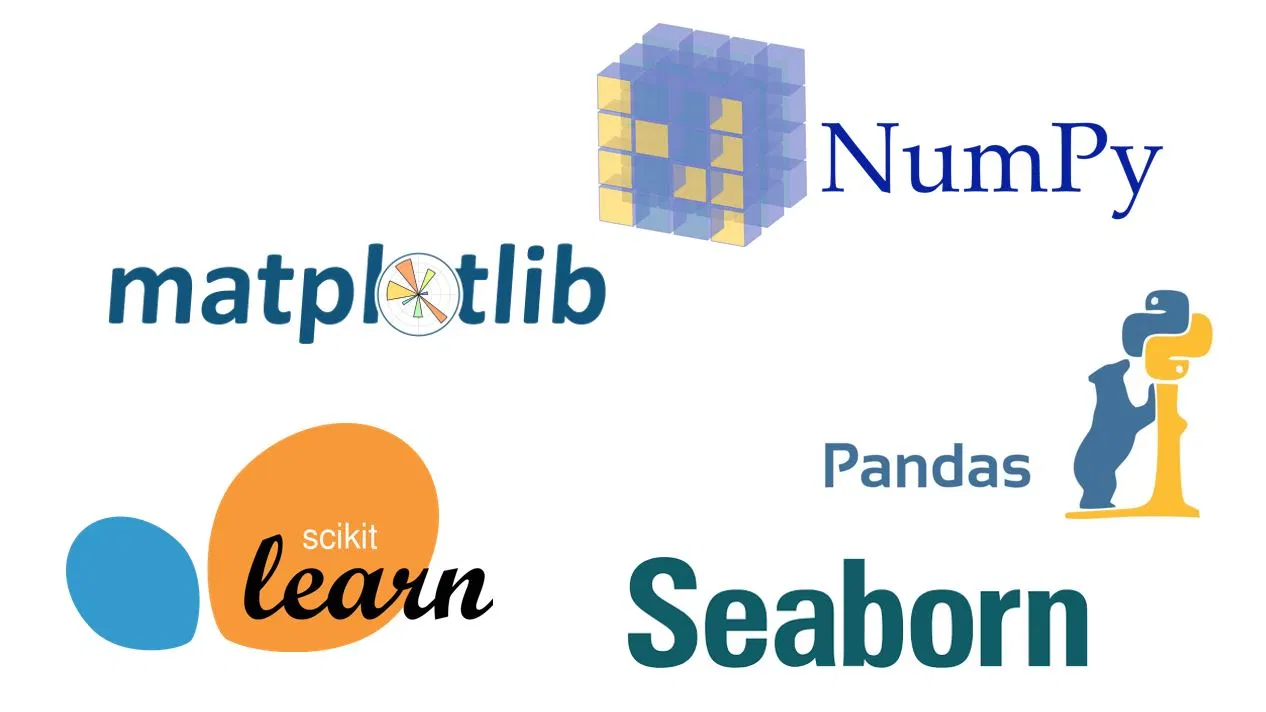

# ***This Notebook contains all evaluation matrixes available in Scikit-learn python library for a Multi-Label Classification***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
seed = pd.read_csv('/kaggle/input/seed-from-uci/Seed_Data.csv')
seed.head()

In [ ]:
seed.shape

In [ ]:
seed.info()

In [ ]:
seed.describe()

# Duplicate Check

In [ ]:
seedd=seed.copy()
seedd.drop_duplicates(subset=None,inplace=True)
seedd.shape

In [ ]:
del seedd
seed.shape

No Duplicates Found

# Missing value Check

In [ ]:
seed.isnull().sum()

No missing value 

In [ ]:
seed.isnull().sum(axis=1)

No missing values in rows 

# EDA 

In [ ]:
sns.violinplot(x='A',data=seed)
plt.show()

No outliers found

In [ ]:
sns.violinplot(y='A',x='target',data=seed)
plt.show()

In [ ]:
sns.violinplot(x='P',data=seed)
plt.show()

No outliers found

In [ ]:
sns.violinplot(y='P',x='target',data=seed)
plt.show()

In [ ]:
sns.violinplot(x='C',data=seed)
plt.show()

Outliers found

In [ ]:
percentiles = seed['C'].quantile([0.05,0.95]).values
seed['C'][seed['C'] <= percentiles[0]] = percentiles[0]
seed['C'][seed['C'] >= percentiles[1]] = percentiles[1]

In [ ]:
sns.violinplot(x='C',data=seed)
plt.show()

In [ ]:
sns.violinplot(y='C',x='target',data=seed)
plt.show()

In [ ]:
sns.violinplot(x='LK',data=seed)
plt.show()

No outliers found

In [ ]:
sns.violinplot(y='LK',x='target',data=seed)
plt.show()

In [ ]:
sns.violinplot(x='WK',data=seed)
plt.show()

No outliers found

In [ ]:
sns.violinplot(y='WK',x='target',data=seed)
plt.show()

In [ ]:
sns.violinplot(x='A_Coef',data=seed)
plt.show()

In [ ]:
percentiles = seed['A_Coef'].quantile([0.01,0.99]).values
seed['A_Coef'][seed['A_Coef'] <= percentiles[0]] = percentiles[0]
seed['A_Coef'][seed['A_Coef'] >= percentiles[1]] = percentiles[1]

Outliers found

In [ ]:
sns.violinplot(x='A_Coef',data=seed)
plt.show()


In [ ]:
sns.violinplot(x='LKG',data=seed)
plt.show()

No outliers found

In [ ]:
sns.violinplot(y='LKG',x='target',data=seed)
plt.show()

In [ ]:
ax=sns.countplot('target',data=seed)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [ ]:
seed.describe()

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(seed.corr(), annot = True, cmap="rainbow")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(seed, train_size=0.7, random_state=11)


In [ ]:
X_train=train.drop('target',axis=1)
X_test=test.drop('target',axis=1)
y_train=train['target']
y_test=test['target']

In [ ]:
# Standarisation technique for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:]=scaler.fit_transform(X_train[:])
X_test[:]=scaler.transform(X_test[:])

In [ ]:
X_train.info()

In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_features_indices

In [ ]:
model.fit(X_train,y_train,cat_features=([]))

# **Evaluation**

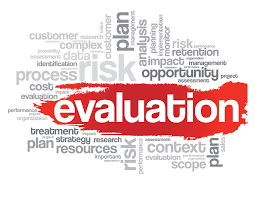

# Score

In [ ]:
import sklearn.metrics
score_cbc=model.score(X_test,y_test)
print('Score :',score_cbc)

# Confusion Matrix

In [ ]:
sklearn.metrics.confusion_matrix(y_test,model.predict(X_test))

# ROC AUC Score

In [ ]:
roc_auc_score_cbc=sklearn.metrics.roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print('Compute Area Under the Receiver Operating Characteristic Curve',roc_auc_score_cbc)

# Cohen Kappa Score

In [ ]:
cohen_kappa_score_cbc=sklearn.metrics.cohen_kappa_score(model.predict(X_test),y_test)
print('Cohen’s kappa :',cohen_kappa_score_cbc)


# F1 Score

In [ ]:
sklearn.metrics.f1_score(y_test,model.predict(X_test),average='macro')

In [ ]:
sklearn.metrics.f1_score(y_test,model.predict(X_test),average='micro')

In [ ]:
sklearn.metrics.f1_score(y_test,model.predict(X_test),average='weighted')

In [ ]:
sklearn.metrics.f1_score(y_test,model.predict(X_test),average=None)

# F Score Beta

In [ ]:
sklearn.metrics.fbeta_score(y_test,model.predict(X_test),average='macro',beta=0.5)

In [ ]:
sklearn.metrics.fbeta_score(y_test,model.predict(X_test),average='micro',beta=0.5)

In [ ]:
sklearn.metrics.fbeta_score(y_test,model.predict(X_test),average='weighted',beta=0.5)

In [ ]:
sklearn.metrics.fbeta_score(y_test,model.predict(X_test),average=None,beta=0.5)

# Hamming Loss

In [ ]:
sklearn.metrics.hamming_loss(y_test,model.predict(X_test))

Compute the average Hamming loss.

# Hinge Loss 

In [ ]:
sklearn.metrics.hinge_loss(y_test,model.predict_proba(X_test))

Average hinge loss (non-regularized)

# Jaccard Score

In [ ]:
sklearn.metrics.jaccard_score(y_test,model.predict(X_test),average='macro')

In [ ]:
sklearn.metrics.jaccard_score(y_test,model.predict(X_test),average='micro')

In [ ]:
sklearn.metrics.jaccard_score(y_test,model.predict(X_test),average='weighted')

In [ ]:
sklearn.metrics.jaccard_score(y_test,model.predict(X_test),average=None)

Jaccard similarity coefficient score

# Log Loss 

In [ ]:
sklearn.metrics.log_loss(y_test,model.predict_proba(X_test))

Log loss, aka logistic loss or cross-entropy loss.


# Multi-Label Confusion Matrix

In [ ]:
sklearn.metrics.multilabel_confusion_matrix(y_test,model.predict(X_test))

Compute a confusion matrix for each class or sample

# Matthews Corrcoef

In [ ]:
sklearn.metrics.matthews_corrcoef(y_test,model.predict(X_test))

Compute the Matthews correlation coefficient (MCC)

# Precision, Recall, FScore &  Support

In [ ]:
sklearn.metrics.precision_recall_fscore_support(y_test,model.predict(X_test))

Compute precision, recall, F-measure and support for each class

# Precision Score 

In [ ]:
sklearn.metrics.precision_score(y_test,model.predict(X_test),average='macro')

In [ ]:
sklearn.metrics.precision_score(y_test,model.predict(X_test),average='micro')

In [ ]:
sklearn.metrics.precision_score(y_test,model.predict(X_test),average='weighted')

In [ ]:
sklearn.metrics.precision_score(y_test,model.predict(X_test),average=None)

Compute the precision

# Recall Score 

In [ ]:
sklearn.metrics.recall_score(y_test,model.predict(X_test),average='macro')

In [ ]:
sklearn.metrics.recall_score(y_test,model.predict(X_test),average='micro')

In [ ]:
sklearn.metrics.recall_score(y_test,model.predict(X_test),average='weighted')

In [ ]:
sklearn.metrics.recall_score(y_test,model.predict(X_test),average=None)

Compute the recall

# Zero-One Loss

In [ ]:
sklearn.metrics.zero_one_loss(y_test,model.predict(X_test))

Zero-one classification loss.

# Classification Report 

In [ ]:
print(sklearn.metrics.classification_report(y_test,model.predict(X_test)))